In [1]:
import warnings
warnings.simplefilter('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read the csv file into a pandas DataFrame
aba = pd.read_csv('abalone.data')
aba.head(20)

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


In [3]:
X = aba[["sex", "length", "diameter", "height", "whole_weight", "shucked_weight", "viscera_weight", "shell_weight"]]
y = aba["rings"].values.reshape(-1, 1)
print(X.shape, y.shape)

(4177, 8) (4177, 1)


In [4]:
from sklearn.model_selection import train_test_split

X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.head()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,sex_F,sex_I,sex_M
3823,0.615,0.455,0.135,1.0590,0.4735,0.2630,0.274,1,0,0
3956,0.515,0.395,0.140,0.6860,0.2810,0.1255,0.220,1,0,0
3623,0.660,0.530,0.175,1.5830,0.7395,0.3505,0.405,0,0,1
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,0,0,1
2183,0.495,0.400,0.155,0.8085,0.2345,0.1155,0.350,0,0,1


In [5]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [6]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

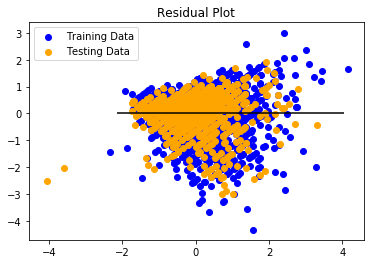

In [7]:
# Plot the results 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [8]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.44856867047894444, R2: 0.5454718270324013


In [9]:
y_scaler.inverse_transform(y_test_scaled)

array([[  9.],
       [  8.],
       [ 16.],
       ..., 
       [  8.],
       [  9.],
       [ 10.]])

In [10]:
y_scaler.inverse_transform(model.predict(X_scaler.transform([[
    0.455,0.365,0.095,0.514,0.2245,0.101,0.15,1,0,0]])))

array([[ 9.12663108]])

In [15]:
y_scaler.inverse_transform(model.predict(X_scaler.transform([[
    0.53,0.42,0.135,0.677,0.2565,0.1415,0.21,0,1,0]])))

array([[ 10.37171678]])